In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
import scipy.linalg as scila
import time

In [34]:
def create_rect(N,M):
     ''' this subroutine creates an ill-conditioned rectangular matrix'''
     a = np.linspace(5,14,M)
     d = 10**(-a)
     
     D2 = np.zeros((N,M))
     for j in range(0,M):
        D2[j,j] = d[j]
     
     '''' create matrices needed to manufacture the low rank matrix'''
     A = np.random.rand(N,N)
     Q1, R = la.qr(A)
     test = np.matmul(Q1,R)
     A =    np.random.rand(M,M)
     Q2,R = la.qr(A)
     test = np.matmul(Q2,R)
     
     B = np.matmul(Q1,D2)
     B = np.matmul(B,Q2)
     return B     

Time for scila.solve with N =  100  is  0.0021509790094569325
Time for scila.lu_factor with N =  100  is  0.0038463620003312826
Time for scila.lu_solve with N =  100  is  0.0003370509948581457
Time for scila.solve with N =  500  is  0.046108915004879236
Time for scila.lu_factor with N =  500  is  0.0705317750107497
Time for scila.lu_solve with N =  500  is  0.002996602008352056


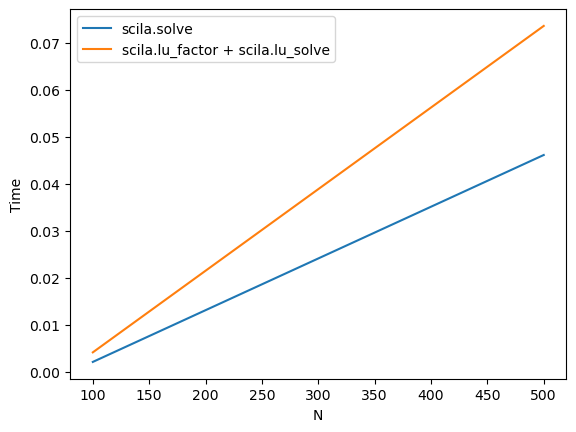

In [23]:
NN = [100, 500]
t_solve = []
t_lu_factor = []
t_lu_solve = []

for N in NN:
    ''' Right hand side'''
    b = np.random.rand(N,1)
    A = np.random.rand(N,N)

    st = time.perf_counter()
    for _ in range(10):
        x_scila = scila.solve(A,b)
    stop = time.perf_counter()
    print('Time for scila.solve with N = ', N, ' is ', stop-st)
    t_solve.append(stop-st)

    st - time.perf_counter()
    for _ in range(10):
        fact = scila.lu_factor(A)
    stop = time.perf_counter()
    print('Time for scila.lu_factor with N = ', N, ' is ', stop-st)
    t_lu_factor.append(stop-st)

    st = time.perf_counter()
    for _ in range(10):
        x_lu = scila.lu_solve(fact,b)
    stop = time.perf_counter()
    print('Time for scila.lu_solve with N = ', N, ' is ', stop-st)
    t_lu_solve.append(stop-st)


# plot
# plt.figure()
# plt.plot(NN, t_lu_factor, label='scila.lu_factor')
# plt.plot(NN, t_lu_solve, label='scila.lu_solve')

# plt.xlabel('N')
# plt.ylabel('Time')
# plt.legend()
# plt.show()

plt.figure()
plt.plot(NN, t_solve, label='scila.solve')
plt.plot(NN, np.array(t_lu_factor) + np.array(t_lu_solve), label='scila.lu_factor + scila.lu_solve')

plt.xlabel('N')
plt.ylabel('Time')
plt.legend()
plt.show()

Time for scila.solve with N =  1000  is  0.03853664902271703
Time for scila.lu_solve with N =  1000  is  0.013846743007889017
Time for scila.solve with N =  1000  is  0.04963742598192766
Time for scila.lu_solve with N =  1000  is  0.017804559000069275
Time for scila.solve with N =  1000  is  0.08695064298808575
Time for scila.lu_solve with N =  1000  is  0.012245468999026343
Time for scila.solve with N =  1000  is  0.10144665601546876
Time for scila.lu_solve with N =  1000  is  0.013875267992261797
Time for scila.solve with N =  1000  is  0.11163638700963929
Time for scila.lu_solve with N =  1000  is  0.015062689984915778
Time for scila.solve with N =  1000  is  0.1502410660032183
Time for scila.lu_solve with N =  1000  is  0.01618319400586188
Time for scila.solve with N =  1000  is  0.13142762199277058
Time for scila.lu_solve with N =  1000  is  0.015034876996651292
Time for scila.solve with N =  1000  is  0.1664455709978938
Time for scila.lu_solve with N =  1000  is  0.01445167299243

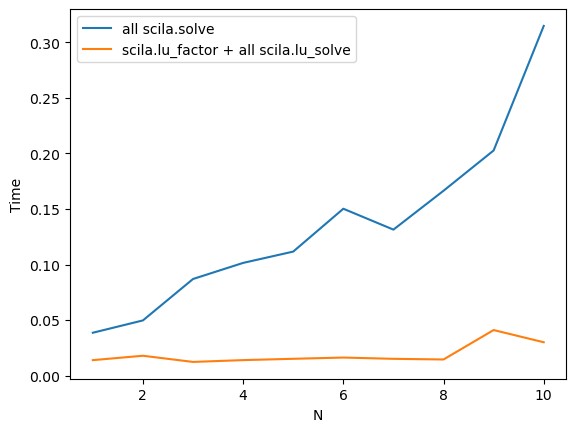

In [26]:
N = 1000
bn = [1,2,3,4,5,6,7,8,9,10]
t_solve = []
t_lu_solve = []

for num in bn:
    ''' Right hand side'''
    b = [np.random.rand(N,1) for _ in range(num)]
    A = np.random.rand(N,N)

    st = time.perf_counter()
    for i in range(num):
        x_scila = scila.solve(A,b[i])
    stop = time.perf_counter()
    print('Time for scila.solve with N = ', N, ' is ', stop-st)
    t_solve.append(stop-st)

    st = time.perf_counter()
    fact = scila.lu_factor(A)

    for i in range(num):
        x_lu = scila.lu_solve(fact,b[i])
    stop = time.perf_counter()
    print('Time for scila.lu_solve with N = ', N, ' is ', stop-st)
    t_lu_solve.append(stop-st)


# plot
# plt.figure()
# plt.plot(NN, t_lu_factor, label='scila.lu_factor')
# plt.plot(NN, t_lu_solve, label='scila.lu_solve')

# plt.xlabel('N')
# plt.ylabel('Time')
# plt.legend()
# plt.show()

plt.figure()
plt.plot(bn, t_solve, label='all scila.solve')
plt.plot(bn, np.array(t_lu_solve), label='scila.lu_factor + all scila.lu_solve')

plt.xlabel('N')
plt.ylabel('Time')
plt.legend()
plt.show()

Time for normal equation with N =  50  is  0.0005373660242184997
Time for QR with N =  50  is  0.001577893999638036
Time for QR with N =  50  is  0.0002210449893027544
Time for normal equation with N =  100  is  0.0009861839935183525
Time for QR with N =  100  is  0.0026824290107470006
Time for QR with N =  100  is  0.0006891049852129072
Time for normal equation with N =  250  is  0.0010347689967602491
Time for QR with N =  250  is  0.0030724740063305944
Time for QR with N =  250  is  0.0007546459964942187
Time for normal equation with N =  500  is  0.0009282030223403126
Time for QR with N =  500  is  0.0022987859847489744
Time for QR with N =  500  is  0.0005849179869983345
Time for normal equation with N =  1000  is  0.0018142180051654577
Time for QR with N =  1000  is  0.005097657005535439
Time for QR with N =  1000  is  0.0006486609927378595


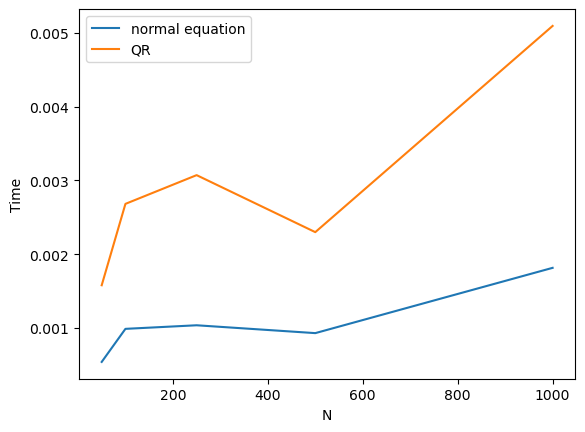

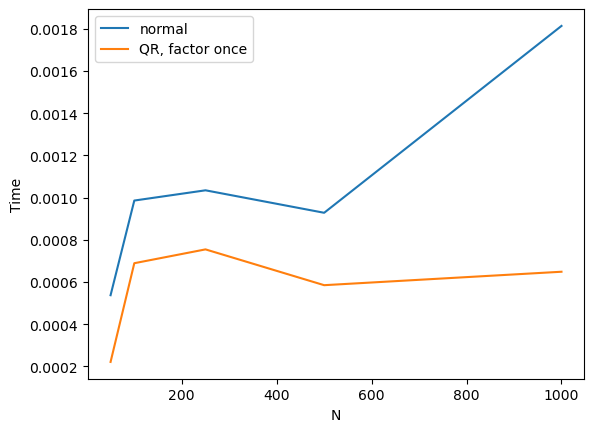

In [39]:
''' Create an ill-conditioned rectangular matrix '''
NN = [50, 100, 250, 500, 1000]
M = 5

t_normal = []
t_qr = []
t_qr_once = []

for N in NN:
    A = create_rect(N,M)     
    b = np.random.rand(N,1)

    # solve via normal equation
    st = time.perf_counter()
    for _ in range(30):
        x = la.solve(np.matmul(A.T,A),np.matmul(A.T,b))
    stop = time.perf_counter()
    print('Time for normal equation with N = ', N, ' is ', stop-st)
    t_normal.append(stop-st)

    # solve via QR
    st = time.perf_counter()
    for _ in range(30):
        Q,R = la.qr(A)
        x = la.solve(R,np.matmul(Q.T,b))
    stop = time.perf_counter()
    print('Time for QR with N = ', N, ' is ', stop-st)
    t_qr.append(stop-st)

    # solve via qr, factor once
    st = time.perf_counter()
    Q,R = la.qr(A)
    for _ in range(30):
        x = la.solve(R,np.matmul(Q.T,b))
    stop = time.perf_counter()
    print('Time for QR with N = ', N, ' is ', stop-st)
    t_qr_once.append(stop-st)


plt.figure()
plt.plot(NN, t_normal, label='normal equation')
plt.plot(NN, t_qr, label='QR')

plt.xlabel('N')
plt.ylabel('Time')
plt.legend()
plt.show()

plt.plot(NN, t_normal, label='normal')
plt.plot(NN, t_qr_once, label='QR, factor once')
plt.xlabel('N')
plt.ylabel('Time')
plt.legend()
plt.show()

